In [1]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [3]:
%%bigquery
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

Downloading: 100%|██████████| 15/15 [00:01<00:00, 10.81rows/s]


,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


In [4]:
%%bigquery total_births
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

Downloading: 100%|██████████| 15/15 [00:01<00:00,  8.59rows/s]


In [5]:
%matplotlib inline

<AxesSubplot:xlabel='year'>

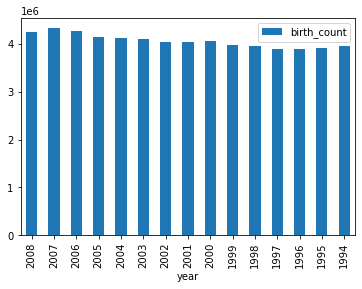

In [6]:
total_births.plot(kind="bar", x="year", y="birth_count")

In [7]:
%%bigquery births_by_weekday
SELECT
    wday,
    SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births,
    SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `bigquery-public-data.samples.natality`
WHERE wday IS NOT NULL
GROUP BY wday
ORDER BY wday ASC

Downloading: 100%|██████████| 7/7 [00:01<00:00,  4.71rows/s]


<AxesSubplot:xlabel='wday'>

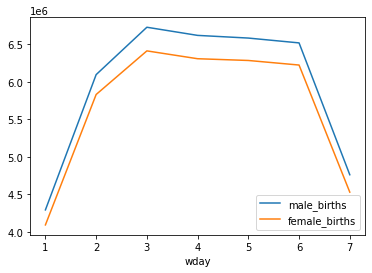

In [8]:
births_by_weekday.plot(x="wday")